In [1]:
#import the required packages for linear and polynomial regression
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import glob

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pandas as pd
from pandas.tseries.offsets import *
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Get the data
df = pd.read_csv(r'./main.csv', index_col=None, header=0)

In [3]:
#Get the required columns
ds = df[['Last_Update','Province_State','Deaths']]

In [4]:
ds

,Last_Update,Province_State,Deaths
0,8/2/2020 4:35,Alabama,1603
1,8/2/2020 4:35,Alaska,24
2,8/2/2020 4:35,Arizona,3747
3,8/2/2020 4:35,Arkansas,458
4,8/2/2020 4:35,California,9345
...,...,...,...
1545,9/1/2020 4:30,Virginia,2580
1546,9/1/2020 4:30,Washington,1915
1547,9/1/2020 4:30,West Virginia,215
1548,9/1/2020 4:30,Wisconsin,1122


In [ ]:
#Remove the hours from the time column: 
ds['Last_Update'] = pd.to_datetime(ds['Last_Update']).dt.date

In [6]:
pd.TimeSeries = pd.Series

def time_series_forecast(ds):
    
    #Get the confimred values of the state
    DeathValue = ds.Deaths.values
    
    #Find the time series
    timeser = pd.TimeSeries(DeathValue , index=pd.to_datetime(ds.Last_Update))
    
    #It is a non-stationary graph so we can turn it into stationary by taking the log
    ts_log_data = np.log(timeser)
    try:
        #Use Autoregressive–moving-average model for prediction
        model = sm.tsa.ARMA(ts_log_data, order=(3, 0)).fit()
        
        #Set the starting and Ending dates
        start_date = ts_log_data.index[-1] + Day(1)
        end_date = ts_log_data.index[-1] + Day(26)
        
        #Predict the values
        y_forecast = model.predict(start_date.isoformat(), end_date.isoformat())
        
        #Return a table with the new values
        Final_Table = pd.Series(np.exp(y_forecast).values, np.arange(1, 27))
        
        return Final_Table
    
    #if there is a convergance error pass it
    except Exception:
        pass

In [9]:
#Find the prediction value of next 26 days for each State
GroupByState = ds.groupby('Province_State')
FinalTable = GroupByState.apply(time_series_forecast)

In [8]:
FinalTable

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,2194.328084,2203.476118,2209.074299,2211.763111,2211.916322,2209.917724,2206.102437,2200.771655,2194.192082,2186.599017,...,2119.397302,2109.218191,2099.131660,2089.186689,2079.423423,2069.874324,2060.565206,2051.516144,2042.742280,2034.254526
Alaska,36.863438,36.704323,36.521966,36.335275,36.147689,35.962907,35.782094,35.605972,35.434757,35.268499,...,34.234608,34.103838,33.976897,33.853663,33.734016,33.617840,33.505026,33.395466,33.289057,33.185700
Arizona,5024.202480,5014.518493,5001.715818,4986.715318,4970.269294,4952.927070,4935.096347,4917.076286,4899.084797,4881.278868,...,4767.849819,4753.552833,4739.737717,4726.394900,4713.512997,4701.079433,4689.080909,4677.503738,4666.334096,4655.558196
Arkansas,807.072642,815.913553,822.866680,828.288364,832.127221,834.518012,835.529554,835.267354,833.827988,831.315601,...,792.108444,784.531828,776.705307,768.696768,760.568452,752.377023,744.173697,736.004435,727.910167,719.927052
California,13053.699151,13085.051280,13089.834884,13084.235535,13061.871934,13028.409944,12983.089900,12928.526411,12865.474186,12795.587558,...,12206.227112,12118.781190,12032.645812,11948.333076,11866.283875,11786.873780,11710.416993,11637.171412,11567.343066,11501.090741
Colorado,1945.596885,1946.104509,1945.913146,1945.435964,1944.664698,1943.712751,1942.622549,1941.442628,1940.203839,1938.931705,...,1930.181944,1929.029519,1927.909050,1926.821066,1925.765703,1924.742802,1923.751990,1922.792734,1921.864390,1920.966235
Connecticut,4464.784368,4464.566926,4464.256714,4463.947651,4463.601418,4463.259257,4462.905016,4462.556763,4462.207652,4461.865547,...,4459.646165,4459.357324,4459.075332,4458.800156,4458.531599,4458.269559,4458.013865,4457.764390,4457.520976,4457.283487
Delaware,604.851960,604.939512,604.742815,604.604026,604.397550,604.207919,604.004774,603.808950,603.613062,603.422191,...,602.192924,602.032640,601.875949,601.722775,601.573036,601.426656,601.283558,601.143669,601.006915,600.873226
Florida,11219.160105,11233.107955,11228.146539,11206.724123,11170.722746,11122.057088,11062.545086,10993.908900,10917.759507,10835.589184,...,10191.458317,10100.336825,10011.344059,9924.892043,9841.319784,9760.900341,9683.847587,9610.322573,9540.439487,9474.271172


In [11]:
FinalTable.to_csv(r'./second.csv', index = False)

In [8]:
#Checking Diagrams
pd.TimeSeries = pd.Series
ts_data = pd.TimeSeries(ds.Confirmed.values, index=pd.to_datetime(ds.Last_Update))

In [13]:
ts_log_data = np.log(ts_data)

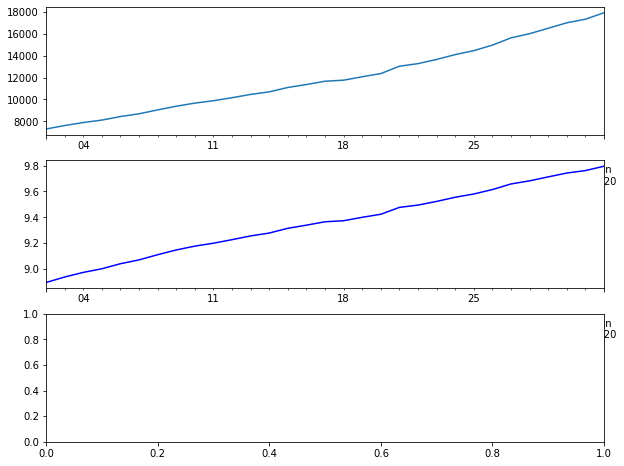

In [14]:
fig, axes = plt.subplots(figsize=(10,8), nrows=3)
ts_data.plot(ax=axes[0])
ts_log_data.plot(ax=axes[1], style='b-', label='actual')


In [56]:
model = sm.tsa.ARMA(ts_log_data, order=(3,0)).fit()
print(model.params)


D:\Users\krato\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const      15.868843
ar.L1.y     0.996787
ar.L2.y     0.982778
ar.L3.y    -0.979587
dtype: float64


D:\Users\krato\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [57]:
start_date = ts_log_data.index[-1] + Day(1)
end_date = ts_log_data.index[-1] + Day(10)

In [58]:
y_forecast = model.predict(start_date.isoformat(), end_date.isoformat())

In [59]:
print(y_forecast)


2020-06-02     9.814174
2020-06-03     9.847156
2020-06-04     9.865522
2020-06-05     9.897909
2020-06-06     9.915932
2020-06-07     9.947735
2020-06-08     9.965423
2020-06-09     9.996654
2020-06-10    10.014015
2020-06-11    10.044686
Freq: D, dtype: float64


In [60]:
print(np.exp(y_forecast))

2020-06-02    18291.172109
2020-06-03    18904.516085
2020-06-04    19254.928891
2020-06-05    19888.737310
2020-06-06    20250.449099
2020-06-07    20904.822096
2020-06-08    21277.880938
2020-06-09    21952.898374
2020-06-10    22337.342233
2020-06-11    23033.063814
Freq: D, dtype: float64
